### Importing important libraries

In [2]:
import pandas as pd

### Merging all sales data

In [3]:
# Creating a list with all month's sales.

import os

sales = os.listdir("Sales_Data")

sales

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [4]:
# Appending all csv to tha dataseries 'db'

df = pd.DataFrame()

for sale in sales:
    
    df2 = pd.read_csv("Sales_Data/" + sale)
    df = pd.concat([df, df2])
    
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [24]:
# Cleasing the data 
# For some reason, on my version of the csv files, there are some NaN in the register

df = df.dropna()

# Another problem is that my csv files contain some coluns that just have the name of
# the colums titles (like Quantity Ordered and Price Each) duplicated among themselves
# So i will find any duplicates and remove them

df = df[df["Order ID"] != "Order ID"]


In [25]:
# Creating the new archive

df.to_csv("All_Months.csv", index = False)


### Starting to read from the new archive 
###### (the previous session should be executed only once to create the archive)

In [26]:
df = pd.read_csv("All_Months.csv")


In [37]:
# Passing Quantity Ordered and Price Each to int and float, respectively.

df["Price Each"] = pd.to_numeric(df["Price Each"]) 
df["Quantity Ordered"] = pd.to_numeric( df["Quantity Ordered"]) 

df


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
185946,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
185947,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
185948,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Wich month was the best for sales? 

In [44]:
# Lots of weird messages pops up when a try to run this code. 
# But it works as expected.

totals = []

for i in range(1, 13):

    month = df[df["Order Date"].str[0:2] == (f"0{i}" if i < 10 else f"{i}")]
    
    month["Total"] = month["Price Each"] * month["Quantity Ordered"]

    totals.append(month.sum()["Total"])

months = pd.Series(totals, 
                   index = "Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec".split(" ")
                  )



/tmp/ipykernel_4704/1171760037.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month["Total"] = month["Price Each"] * month["Quantity Ordered"]
/tmp/ipykernel_4704/1171760037.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month["Total"] = month["Price Each"] * month["Quantity Ordered"]
/tmp/ipykernel_4704/1171760037.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

Sales by month: 


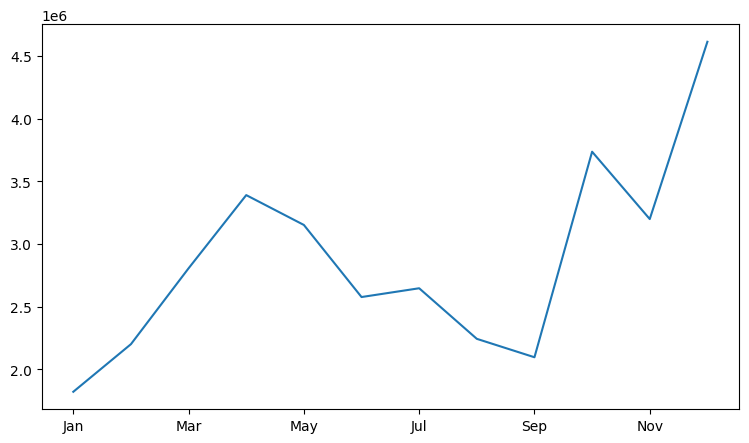

In [45]:
# Spoiler: Its January :)

months.plot(figsize = (9, 5))

print("Sales by month: ")